In [8]:
# Load the data
import pandas as pd
df = pd.read_csv('simple_housing_dataset.csv')
x = df['area']
y = df['price']
# normalize the data by dividing by the maximum value
x_max = x.max()
y_max = y.max()
x = x / x_max
y = y / y_max

In [9]:
# Create mode with scikit-learn 
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(x.values.reshape(-1, 1), y)


LinearRegression()

In [10]:
# train model with SimpleLinearRegression 
from SimpleLinearRegression import SimpleLinearRegression

my_model = SimpleLinearRegression()
lr = 3.0e-1
epochs = 1000
my_model.fit(x, y, lr, epochs)


 0 Cost: 0.074548 | dldw: -0.178393 | dldb : -0.357000  w: 0.000000 | b: 0.000000
 100 Cost: 0.007052 | dldw: -0.004193 | dldb : 0.001952  w: 0.341002 | b: 0.204841
 200 Cost: 0.006748 | dldw: -0.001749 | dldb : 0.000814  w: 0.425227 | b: 0.165639
 300 Cost: 0.006695 | dldw: -0.000730 | dldb : 0.000340  w: 0.460360 | b: 0.149287
 400 Cost: 0.006686 | dldw: -0.000304 | dldb : 0.000142  w: 0.475015 | b: 0.142466


In [11]:
print(f'my_model == weights: {my_model.w}, bias: {my_model.b}')
print(f'sk_model == weights: {sk_model.coef_[0]}, bias: {sk_model.intercept_}')

my_model == weights: 0.4811275037088397, bias: 0.1396208836286119
sk_model == weights: 0.48550218604593404, bias: 0.13758472703885424


In [12]:
# predict the price of a 9000 sq. ft. house with both models

new_val = 9000 / x_max

my_predction = my_model.predict(new_val)
sk_prediction = sk_model.predict([[new_val]])

print(f'my_model prediction: {my_predction * y_max}')
print(f'sk_model prediction: {sk_prediction * y_max}')

my_model prediction: 7010511.416148513
sk_model prediction: [7030289.54699469]


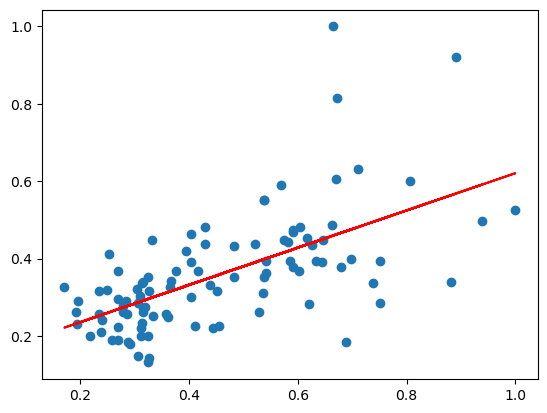

In [15]:
# plot the linear regression line
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x, y)
plt.plot(x, my_model.predict(x), color='red')
plt.show()

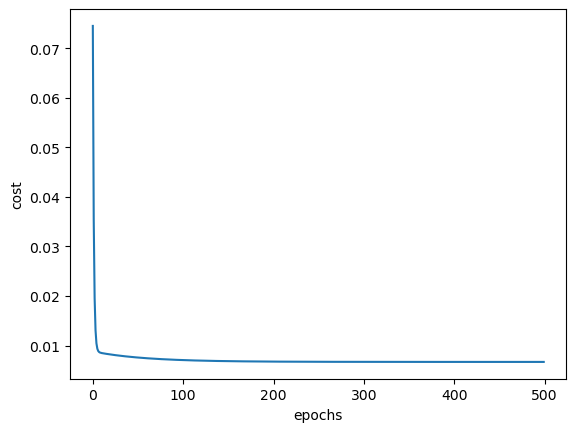

In [14]:
# plot the cost vs epochs
import matplotlib.pyplot as plt

plt.plot(my_model.costs)
plt.xlabel('epochs')
plt.ylabel('cost')
plt.show()
